In [64]:
import numpy as np 
import tensorflow as tf 
import pandas as pd 
import os 
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Activation , Dropout , Reshape
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
assert hasattr(tf, "function") #On vérifie qu'on utilise la version 2.0 de tensorflow

In [12]:
dataset = pd.read_csv('Documents/X/PSC/Datasets/digit-recognizer/train.csv')
digits = range(10)

In [75]:

y = dataset['label']
X = dataset.drop('label', axis=1)
X = np.asarray(X)
y = np.asarray(y)

#On normalise les données
X = X/255

shape = X[0].shape
print(shape)

(784,)


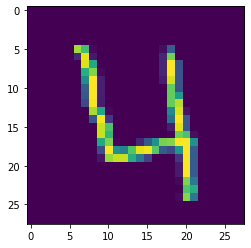

Label : 4


In [76]:
#On affiche une image : 

image = X[3].reshape(28,28)
plt.imshow(image)
plt.show()
print('Label :',y[3])

In [77]:
X_train , X_valid , Y_train , Y_valid = train_test_split(X, y, test_size=0.2)

In [80]:
def create_model():
    
    model = Sequential()
    
    model.add(Reshape((28,28,1), input_shape=shape))
              
    model.add(Conv2D(64 , 4 , activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(128,3,activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(256,3,activation='relu'))
    model.add(MaxPooling2D(2))
    
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dense(10 , activation = 'softmax'))
    
    return model

In [81]:
model = create_model()

In [82]:
epoch = 10 
batch_size = 32 

In [85]:

model.summary()

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])



Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 256)        

In [86]:
model.fit(X_train,Y_train,validation_data=(X_valid,Y_valid),epochs=epoch , batch_size = batch_size)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 62s 2ms/sample - loss: 0.2047 - accuracy: 0.9353 - val_loss: 0.0720 - val_accuracy: 0.9782
Epoch 2/10
33600/33600 [==============================] - 65s 2ms/sample - loss: 0.0635 - accuracy: 0.9803 - val_loss: 0.0546 - val_accuracy: 0.9835
Epoch 3/10
33600/33600 [==============================] - 51s 2ms/sample - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.0413 - val_accuracy: 0.9856
Epoch 4/10
33600/33600 [==============================] - 55s 2ms/sample - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0584 - val_accuracy: 0.9832
Epoch 5/10
33600/33600 [==============================] - 63s 2ms/sample - loss: 0.0273 - accuracy: 0.9918 - val_loss: 0.0523 - val_accuracy: 0.9849
Epoch 6/10
33600/33600 [==============================] - 63s 2ms/sample - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.0520 - val_accuracy: 0.9845
Epoch 7/10
33600/33600 [==============================] -

In [92]:
test_dataset = pd.read_csv('Documents/X/PSC/Datasets/digit-recognizer/test.csv')

X_test = np.asarray(test_dataset)

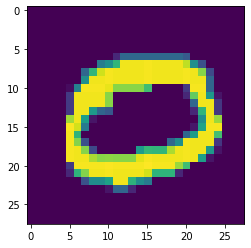

(784,)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [106]:
image = X_test[1].reshape(28,28)
plt.imshow(image)
plt.show()
print(X_test[1].shape)
test = X_test[1].reshape(1,784)
test = test.astype(np.float32)
model.predict(test)